# plot labels for classifpaper

In [30]:
import sys
sys.path.append('..')
import os
import agronn.classif2 as classif2
import random
import numpy as np
import unidecode
import numpy.ma as ma
import pylab as pl
import skimage
import matplotlib.cm as cm
import skimage.color as skcolor
import sklearn.cross_validation as skcross
import scipy.stats as stats
import skimage.color as skcolor
from osgeo import gdal
from osgeo import ogr
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


23 classes


<matplotlib.colorbar.Colorbar instance at 0x7f7ae9c4f3b0>

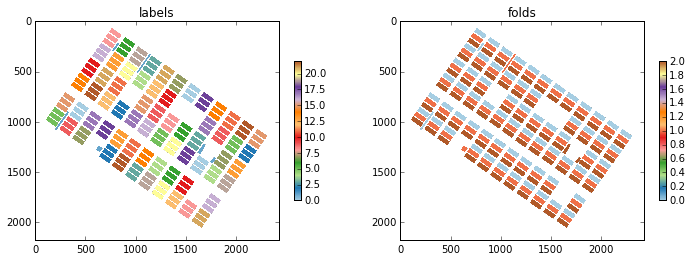

In [31]:
labels, id2label, folds, _ = classif2.load_labels(4)
labels_6, _, folds_6, _ = classif2.load_labels(6)
id2label = np.array([unidecode.unidecode(l) for l in id2label])
nclasses = len(id2label)

print len(id2label), 'classes'

pl.figure(figsize=(12, 5))
pl.subplot(121)
pl.title('labels')
pl.imshow(labels, cmap=cm.Paired)
pl.colorbar(shrink=0.5)

pl.subplot(122)
pl.title('folds')
pl.imshow(folds, cmap=cm.Paired)
pl.colorbar(shrink=0.5)

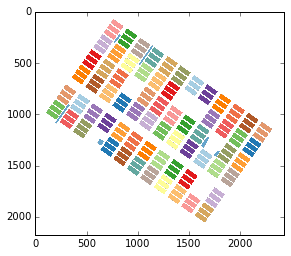

In [55]:
# (vmin, vmax is inclusive)
lab_cmap = cm.ScalarMappable(mplcolors.Normalize(vmin=0, vmax=22), cmap=cm.Paired)
labels_img = np.zeros_like(img_rgba)
for lid in xrange(len(id2label)):
    labels_img[(labels == lid).filled(False)] = lab_cmap.to_rgba(lid)
pl.imshow(labels_img, cmap=cm.Paired)


In [56]:
for lab in id2label:
    print lab, "|",

Avoine | Bare soil | CC4CA | Chanvre | Chia | Feverole | Lentille | Lin | M blanche | Moha | Navette | Niger | Phacelie | Pois | R chinois | R fourrager | Sarepta | Sarrasin | Simplex | Sorgho | Tournesol | Trefle | Vesce |


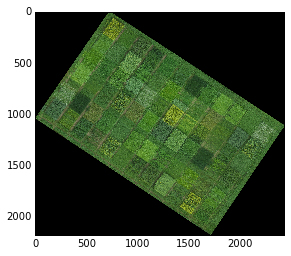

In [57]:
img_rgb = classif2.load_image('2013_10_08', 'rgb')
img_rgb = skimage.img_as_float(img_rgb).astype(np.float32)
pl.imshow(img_rgb)

 ## Labels

In [58]:
img_rgba = np.zeros((img_rgb.shape[0], img_rgb.shape[1], 4), dtype=np.float32)

In [59]:
import numpy.ma as ma
import skimage
import skimage.transform as sktransf
import matplotlib.colors as mplcolors
import cv2

# -- labels

labels_img = np.zeros_like(img_rgba)
for lid in xrange(len(id2label)):
    labels_img[(labels == lid).filled(False)] = lab_cmap.to_rgba(lid)
    
# -- folds
fold_cmap = cm.ScalarMappable(mplcolors.Normalize(vmin=0, vmax=3), cmap=cm.Paired)
folds_0_img = np.zeros_like(img_rgba)
for lid, lname in [(True, 'test fold'), (False, 'train_fold')]:
    col = fold_cmap.to_rgba(lid)
    folds_0_img[folds == 0] = fold_cmap.to_rgba(1)
    folds_0_img[folds != 0] = fold_cmap.to_rgba(0)
    folds_0_img[folds.mask] = 0
    
folds_1_img = np.zeros_like(img_rgba)
for lid, lname in [(True, 'test fold'), (False, 'train_fold')]:
    col = fold_cmap.to_rgba(lid)
    folds_1_img[folds_6 == 0] = fold_cmap.to_rgba(1)
    folds_1_img[folds_6 != 0] = fold_cmap.to_rgba(0)
    folds_1_img[folds_6.mask] = 0
    
# rotate
if True:
    def _rot(img, angle=35):
        #return sktransf.rotate(img, angle, cval=0, mode='constant', order=3)
        
        rotated = sktransf.rotate(img, angle, cval=0, mode='constant', order=3)
        # autocrop
        
        if True:
            ii, jj = np.nonzero(rotated[:,:,3])
            mini, maxi = np.min(ii), np.max(ii)
            minj, maxj = np.min(jj), np.max(jj)
            rotated = rotated[mini:maxi, minj:maxj]
        
        # use white background (AFTER cropping) to avoid artifacts
        rotated[rotated[:,:,3] < 0.95] = 1
        return rotated
    
    #def _rot(img):
    #    M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1)
    #    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    labels_img = _rot(labels_img)
    folds_0_img = _rot(folds_0_img)
    folds_1_img = _rot(folds_1_img)

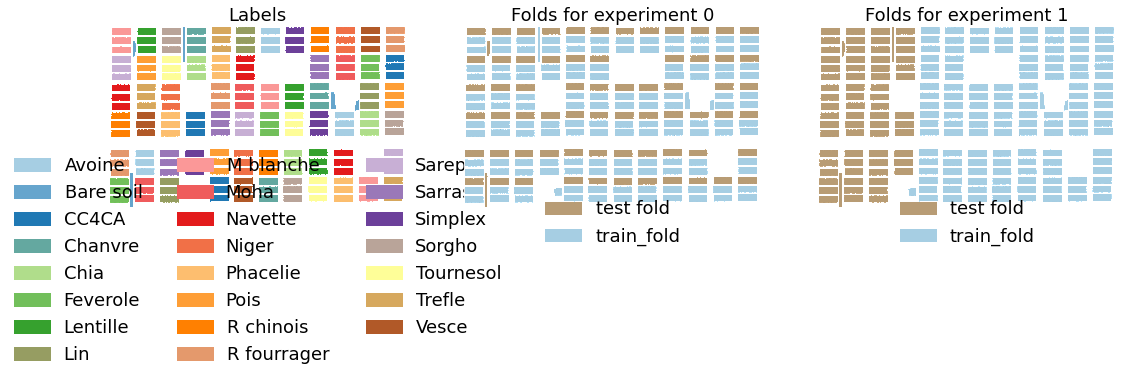

In [60]:
def _folds_legend():
    lgd_handles = []
    lgd_labels = []
    for lid, lname in [(True, 'test fold'), (False, 'train_fold')]:
        col = fold_cmap.to_rgba(lid)
        artist = pl.Rectangle((0, 0), 1, 1, color=col)
        lgd_handles.append(artist)
        lgd_labels.append(lname)

    pl.legend(lgd_handles, lgd_labels, bbox_to_anchor=(0.5, -0.35), loc='lower center',
              ncol=1, borderaxespad=1, frameon=False)

    
matplotlib.rcParams.update({'font.size': 15})

    
pl.figure(figsize=(18, 8))
pl.subplot(131)
pl.title('Labels')

pl.imshow(labels_img, interpolation='none')

lgd_handles = []
lgd_labels = []
for lid, lname in enumerate(id2label):
    col = lab_cmap.to_rgba(lid)
    artist = pl.Rectangle((0, 0), 1, 1, color=col)
    lgd_handles.append(artist)
    lgd_labels.append(lname)

pl.axis('off')
pl.legend(lgd_handles, lgd_labels, bbox_to_anchor=(0.5, -1), loc='lower center',
          ncol=3, borderaxespad=1, frameon=False)

pl.subplot(132)
pl.title('Folds for experiment 0')
pl.imshow(folds_0_img, interpolation='none')
_folds_legend()
pl.axis('off')

pl.subplot(133)
pl.title('Folds for experiment 1')
pl.imshow(folds_1_img, interpolation='none')
_folds_legend()
pl.axis('off')

if True:
    pl.savefig('../../latex/figs/labels.pdf', dpi=150, bbox_inches='tight')

In [ ]:
pl.figure(figsize=(18, 8))

pl.imshow(labels_img, interpolation='none')
pl.axis('off')

pl.savefig('/home/julien/Dropbox/work/labels_tmp.svg', dpi=150, bbox_inches='tight')

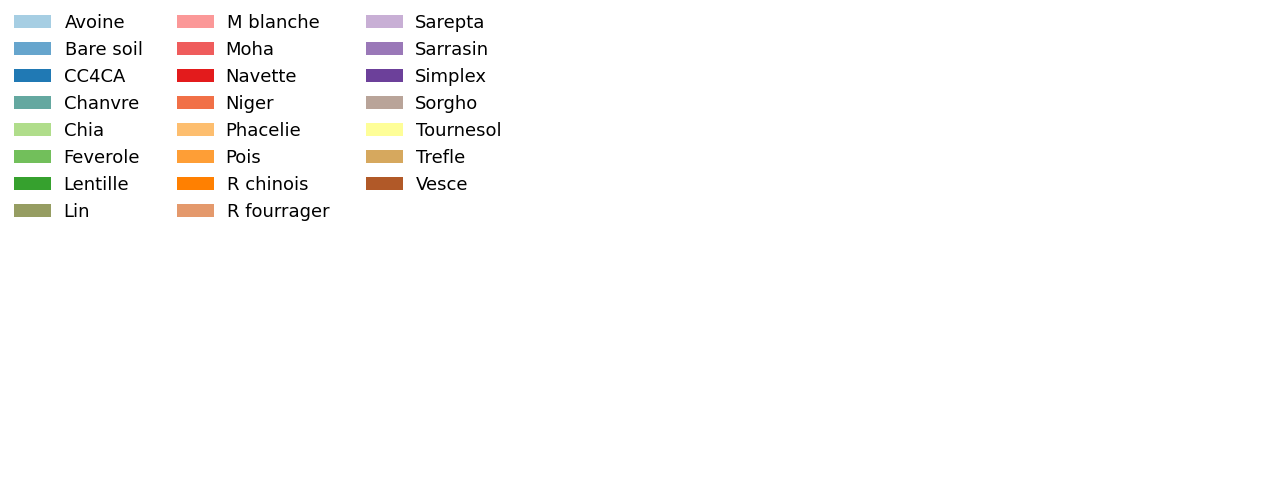

In [66]:
pl.figure(figsize=(18, 8))
lgd_handles = []
lgd_labels = []
for lid, lname in enumerate(id2label):
    col = lab_cmap.to_rgba(lid)
    artist = pl.Rectangle((0, 0), 1, 1, color=col)
    lgd_handles.append(artist)
    lgd_labels.append(lname)
    
pl.axis('off')
pl.legend(lgd_handles, lgd_labels, bbox_to_anchor=(0, 0.5), loc='lower center',
          ncol=3, borderaxespad=1, frameon=False)
pl.savefig('/home/julien/Dropbox/work/labels_text.svg', dpi=150, bbox_inches='tight')
    
#pl.savefig('../../latex/figs_src/labels_tmp.svg', dpi=300, bbox_inches='tight')